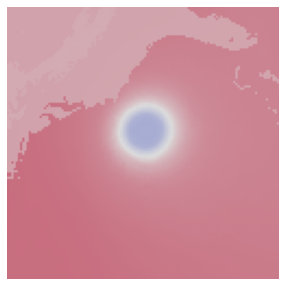

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF1.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

####### implment you direct volume rendering here and store the final image in "img"
def inter(data, lowData, highData, lowRet, highRet):
    r = (data - lowData) / (highData - lowData)
    if isinstance(lowRet, list):
        ret = lowRet
        ret[0] = ret[0] + ((highRet[0] - lowRet[0]) * r)
        ret[1] = ret[1] + ((highRet[1] - lowRet[1]) * r)
        ret[2] = ret[2] + ((highRet[2] - lowRet[2]) * r)
    else:
        ret = lowRet + ((highRet - lowRet) * r)
    return ret

def getColor(nowData):
    for index in range(len(colorTransferFunc) - 1):
        if nowData > colorTransferFunc[index][0] and nowData <= colorTransferFunc[index + 1][0]:
            return inter(nowData, colorTransferFunc[index][0], colorTransferFunc[index + 1][0], colorTransferFunc[index][1:4], colorTransferFunc[index + 1][1:4])

def getAlpha(nowData):
    for index in range(len(opacityTransferFunc) - 1):
        if nowData > opacityTransferFunc[index][0] and nowData <= opacityTransferFunc[index + 1][0]:
            return inter(nowData, opacityTransferFunc[index][0], opacityTransferFunc[index + 1][0], opacityTransferFunc[index][1], opacityTransferFunc[index + 1][1])

def getRender(x, y):
    
    C = [0, 0, 0]
    alpha = 0
    
    for z in range(50):
        nowData = getValue(x, y, z)
        nowColor = getColor(nowData)
        nowAlpha = getAlpha(nowData)
        
        C[0] = C[0] + (nowColor[0] * nowAlpha * (1 - alpha))
        C[1] = C[1] + (nowColor[1] * nowAlpha * (1 - alpha))
        C[2] = C[2] + (nowColor[2] * nowAlpha * (1 - alpha))
        alpha = (alpha + nowAlpha * (1 - alpha))
    
    return C

for x in range(125):
    for y in range(125):
        color = getRender(x, y)
        img[x][y] = color
            

####### show final image (img)
plt.imshow(img)
plt.show()

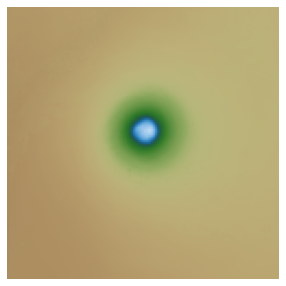

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

###########main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF2.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

####### implment you direct volume rendering here and store the final image in "img"
def inter(data, lowData, highData, lowRet, highRet):
    r = (data - lowData) / (highData - lowData)
    if isinstance(lowRet, list):
        ret = lowRet
        ret[0] = ret[0] + ((highRet[0] - lowRet[0]) * r)
        ret[1] = ret[1] + ((highRet[1] - lowRet[1]) * r)
        ret[2] = ret[2] + ((highRet[2] - lowRet[2]) * r)
    else:
        ret = lowRet + ((highRet - lowRet) * r)
    return ret

def getColor(nowData):
    for index in range(len(colorTransferFunc) - 1):
        if nowData > colorTransferFunc[index][0] and nowData <= colorTransferFunc[index + 1][0]:
            return inter(nowData, colorTransferFunc[index][0], colorTransferFunc[index + 1][0], colorTransferFunc[index][1:4], colorTransferFunc[index + 1][1:4])

def getAlpha(nowData):
    for index in range(len(opacityTransferFunc) - 1):
        if nowData > opacityTransferFunc[index][0] and nowData <= opacityTransferFunc[index + 1][0]:
            return inter(nowData, opacityTransferFunc[index][0], opacityTransferFunc[index + 1][0], opacityTransferFunc[index][1], opacityTransferFunc[index + 1][1])

def getRender(x, y):
    
    C = [0, 0, 0]
    alpha = 0
    
    for z in range(50):
        nowData = getValue(x, y, z)
        nowColor = getColor(nowData)
        nowAlpha = getAlpha(nowData)
        
        C[0] = C[0] + (nowColor[0] * nowAlpha * (1 - alpha))
        C[1] = C[1] + (nowColor[1] * nowAlpha * (1 - alpha))
        C[2] = C[2] + (nowColor[2] * nowAlpha * (1 - alpha))
        alpha = (alpha + nowAlpha * (1 - alpha))
    
    return C

for x in range(125):
    for y in range(125):
        color = getRender(x, y)
        img[x][y] = color
            

####### show final image (img)
plt.imshow(img)
plt.show()

In [ ]:
s